# Overview

This is a notebook to get the general idea of the data that the models are trained on. This has no direct application to the models themselves.

In [1]:
#Load dataset
import torch
import pandas as pd
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import torch.nn as nn
from torch.optim import Adam
from tqdm import tqdm
import numpy as np
import time
import datetime
import os

def load_image(image_path):
    # Open the image file
    with open(image_path, "rb") as f:
        image = Image.open(f)
        image = image.convert("RGB")  # Convert to RGB if not already
    return image

train_data = pd.read_csv("./data/train.csv")      
train_data["PCI"]
    
test_data = pd.read_csv("./data/test.csv")

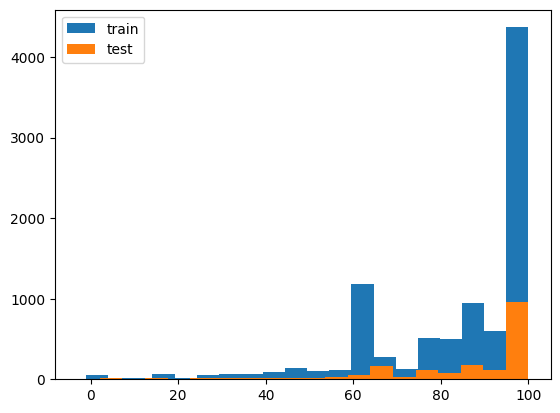

In [2]:
from matplotlib import pyplot as plt

# plot distribution of PCIs
plt.hist(train_data["PCI"], bins=20)
plt.hist(test_data["PCI"], bins=20)
plt.legend(["train", "test"])
plt.show()

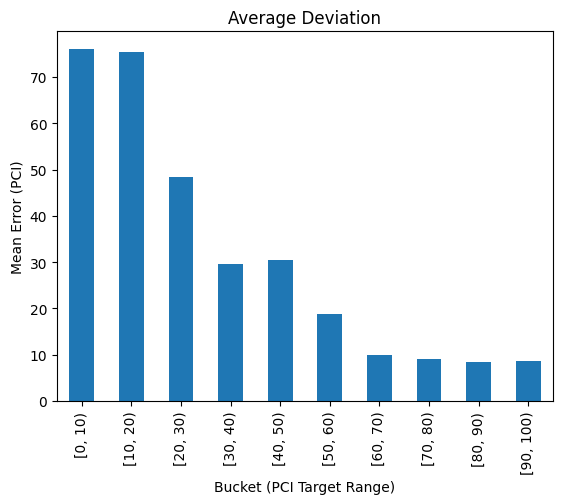

In [23]:
testing_data = pd.read_csv("./testing.csv")
testing_data["Error"] = abs(testing_data["Target"] - testing_data["Predicted"])

buckets = np.arange(0, testing_data['Target'].max() + 10, 10)
testing_data['Bucket'] = pd.cut(testing_data['Target'], bins=buckets, right=False)
bucket_error = testing_data.groupby('Bucket', observed=True)['Error'].mean()


bucket_error.plot(kind='bar')
plt.xlabel('Bucket (PCI Target Range)')
plt.ylabel('Mean Error (PCI)')
plt.title('Average Deviation')
plt.show()

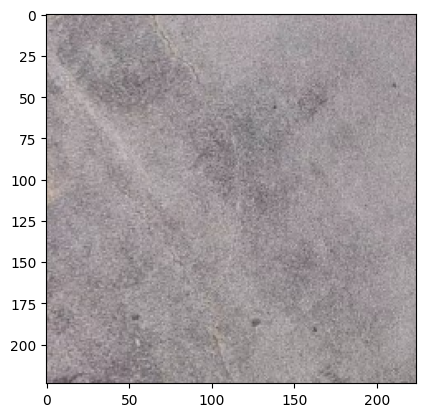

2_[40.71559672113631, -89.44453775765967]_ 2023-10-18 15-41-16_9.92895_LD.jpg 100


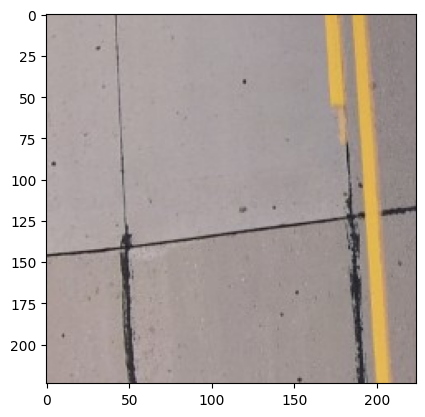

78_[40.71672582122897, -89.44123935269084]_ 2023-10-18 15-41-58_52.80825_LD.jpg 100


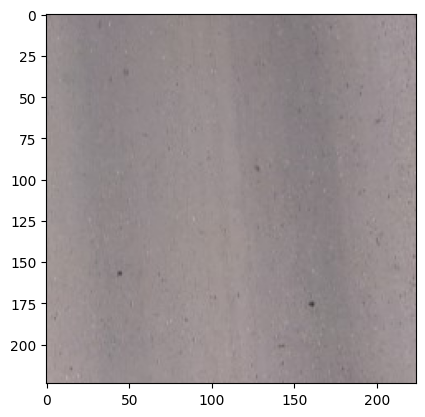

153_(40.7177588333333, -89.4372176666667)_ 2023-10-18 15-42-20_60.2027_D.jpg 100


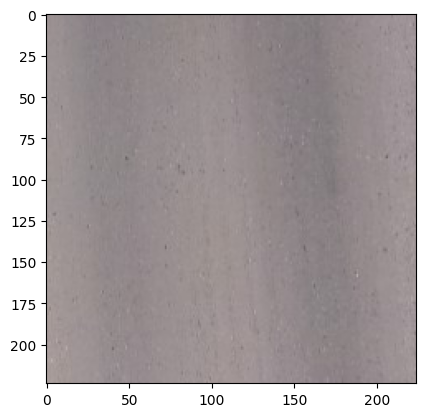

154_(40.7177746666667, -89.4371618333333)_ 2023-10-18 15-42-20_60.24155_D.jpg 100


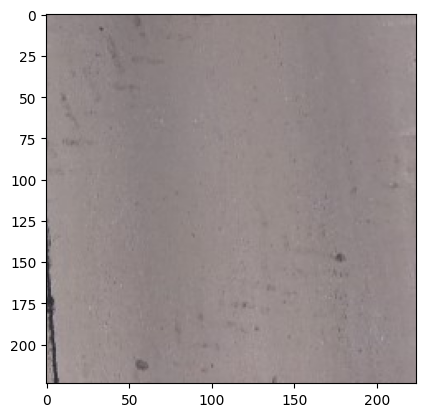

205_(40.7187718333333, -89.4346376666667)_ 2023-10-18 15-42-36_57.4721_D.jpg 100


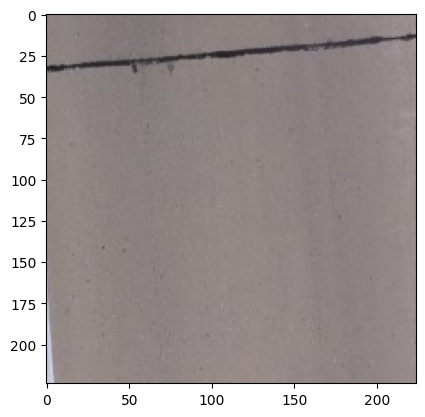

212_(40.7189271666667, -89.4342951666667)_ 2023-10-18 15-42-38_57.16685_D.jpg 100


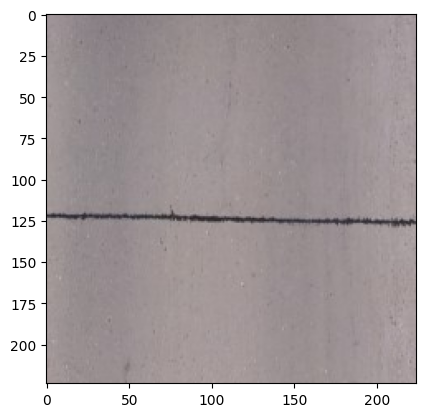

255_(40.7192353333333, -89.4321095)_ 2023-10-18 15-42-51_56.2992_D.jpg 100


279_[40.7192207513635, -89.4307118442312]_ 2023-10-18 15-42-58_59.6958_LD.jpg 100


350_(40.7195571666667, -89.4266475)_ 2023-10-18 15-43-19_55.7331_D.jpg 100


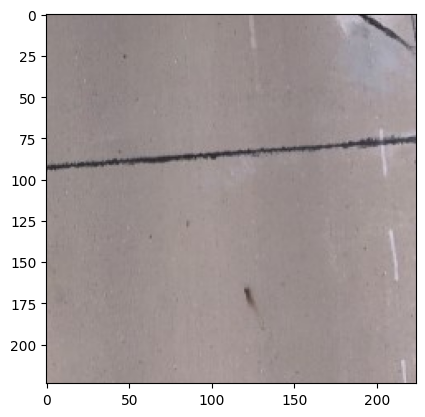

360_(40.7197366666667, -89.4261583333333)_ 2023-10-18 15-43-22_54.25125_D.jpg 100


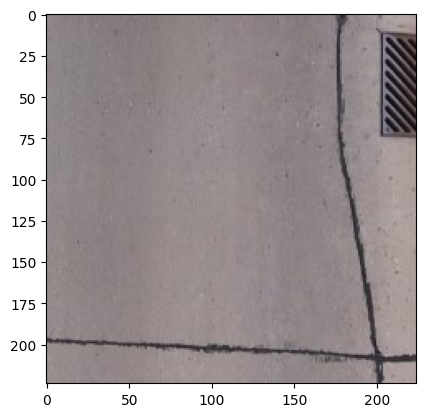

370_(40.7198701666667, -89.4256716666667)_ 2023-10-18 15-43-25_51.7519_D.jpg 100


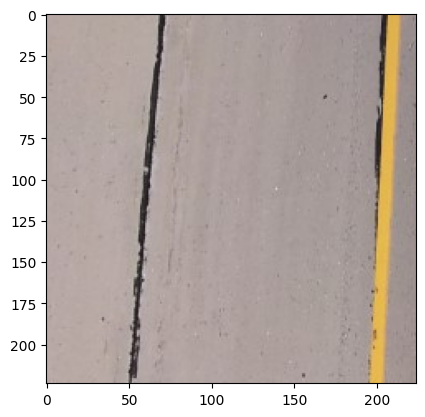

392_[40.71990892243573, -89.42454531776782]_ 2023-10-18 15-43-32_53.84055_LD.jpg 100


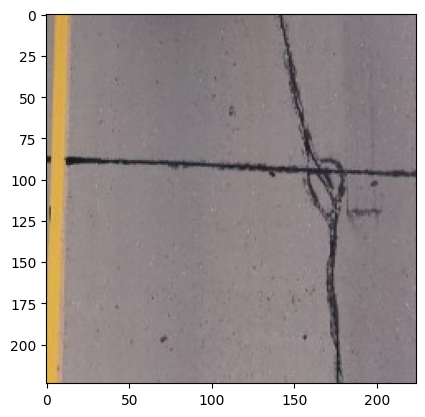

422_(40.7199705, -89.4228126666667)_ 2023-10-18 15-43-41_62.4227_D.jpg 100


445_(40.7199948333333, -89.4214095)_ 2023-10-18 15-43-48_61.6198_D.jpg 100


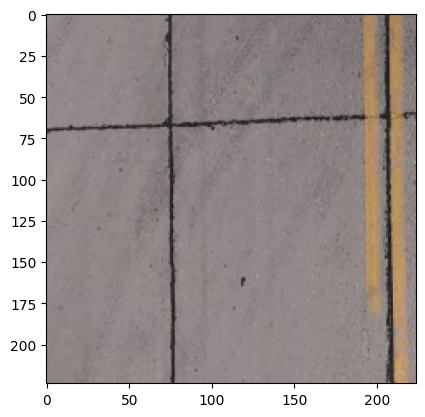

496_[40.72002275456424, -89.41824171973025]_ 2023-10-18 15-44-03_62.16185_LD.jpg 100


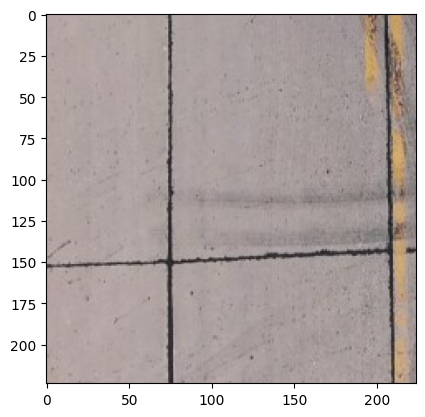

498_[40.720025255879506, -89.41811914526583]_ 2023-10-18 15-44-04_62.0268_LD.jpg 100


501_[40.72002875746783, -89.4179360675585]_ 2023-10-18 15-44-04_61.70675_LD.jpg 100


516_(40.7200721666667, -89.4170243333333)_ 2023-10-18 15-44-09_62.64285_D.jpg 100


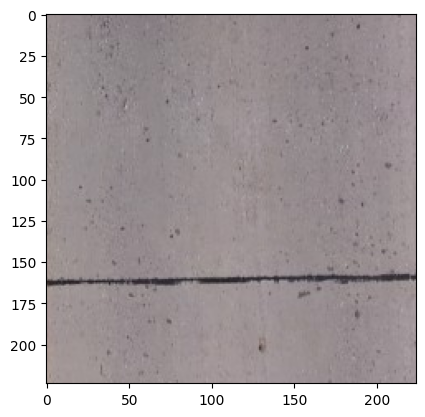

533_(40.7200883333333, -89.415923)_ 2023-10-18 15-44-14_67.9468_D.jpg 100


538_(40.7200928333333, -89.4155846666666)_ 2023-10-18 15-44-16_68.9162_D.jpg 100


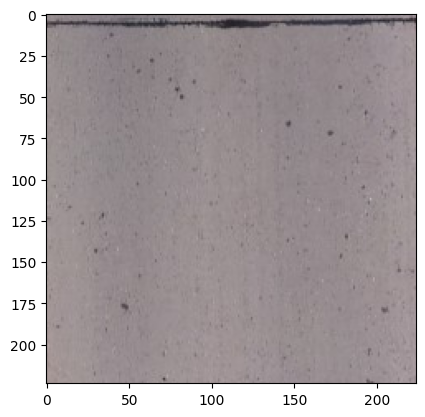

539_(40.7200938333333, -89.4155165)_ 2023-10-18 15-44-16_68.8977_D.jpg 100


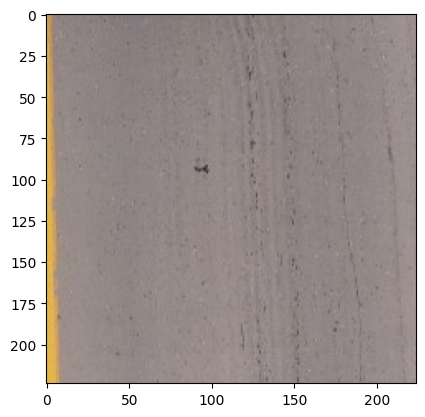

603_(40.7201565, -89.4111786666667)_ 2023-10-18 15-44-35_61.33675_D.jpg 100


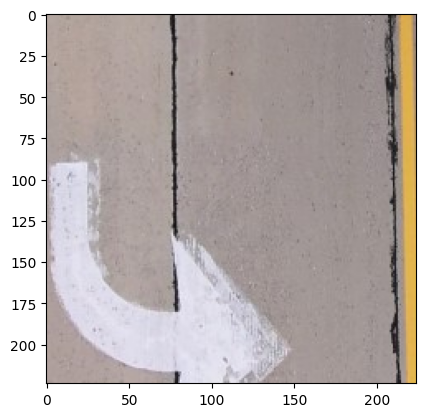

615_[40.72013975694006, -89.41048309221134]_ 2023-10-18 15-44-39_56.23815_LD.jpg 100


617_(40.7201691666667, -89.4103736666667)_ 2023-10-18 15-44-39_55.3705_D.jpg 100


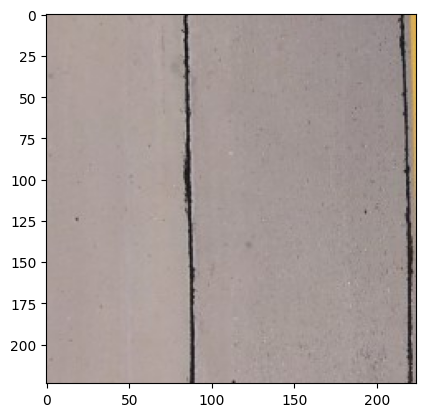

623_[40.7201470864785, -89.41005381744985]_ 2023-10-18 15-44-41_52.836_LD.jpg 100


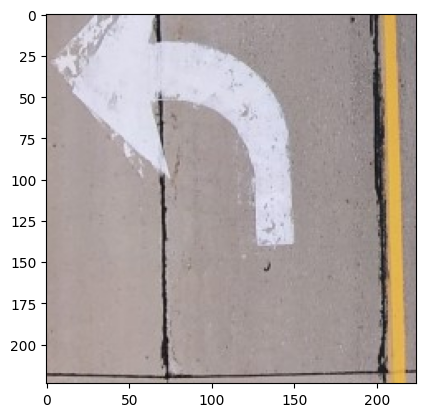

629_[40.720149584859456, -89.40974815117292]_ 2023-10-18 15-44-43_50.8454_LD.jpg 100


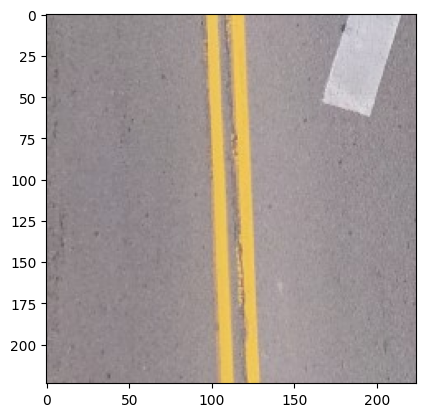

995_[40.70668682107089, -89.4070800441786]_ 2023-10-18 15-46-58_27.5391_LD.jpg 100


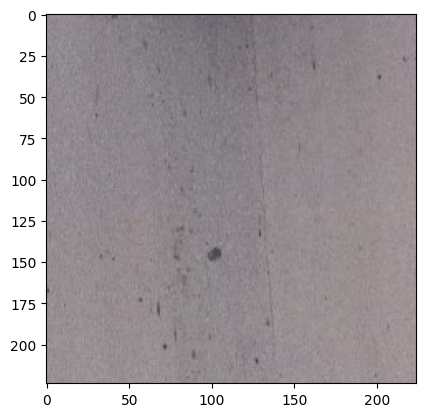

997_(40.7066173333333, -89.4070428333333)_ 2023-10-18 15-46-59_29.57225_D.jpg 100


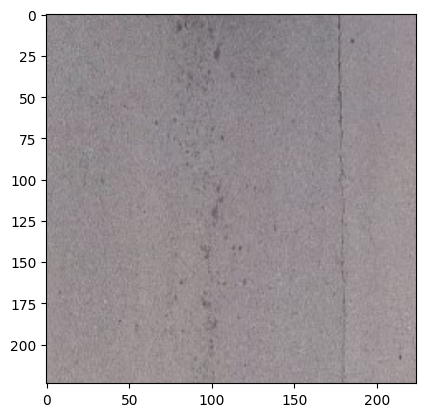

1031_(40.7052763333333, -89.406978)_ 2023-10-18 15-47-20_32.0753_D.jpg 100


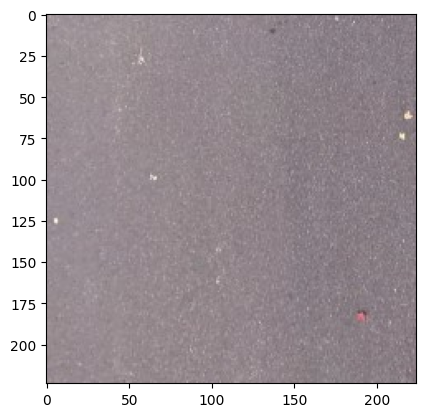

1126_[40.70365895346456, -89.40512393171025]_ 2023-10-18 15-49-07_21.6302_LD.jpg 100


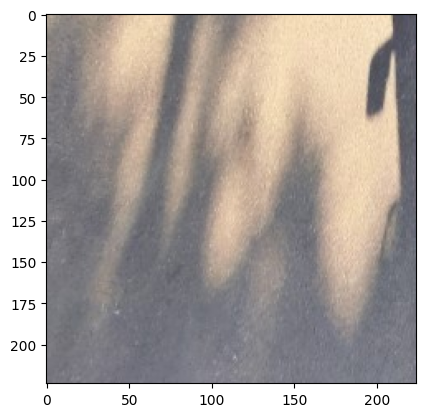

1140_[40.70077085652934, -89.39957709593865]_ 2023-10-20 21-36-17_12.4172_LD.jpg 100


1147_[40.70055716666663, -89.3997050445]_ 2023-10-20 21-36-25_14.73155_LD.jpg 100


1154_(40.7002838333333, -89.3996808333333)_ 2023-10-20 21-36-31_20.35925_D.jpg 100


1156_(40.7002071666667, -89.3996793333333)_ 2023-10-20 21-36-33_21.7597_D.jpg 100


1156_[40.70020599612192, -89.39970672407881]_ 2023-10-20 21-36-33_21.7597_LD.jpg 100


1174_[40.699764584404576, -89.40008542411343]_ 2023-10-20 21-36-47_21.05855_LD.jpg 100


1176_(40.6997791666667, -89.4001825)_ 2023-10-20 21-36-49_14.05445_D.jpg 100


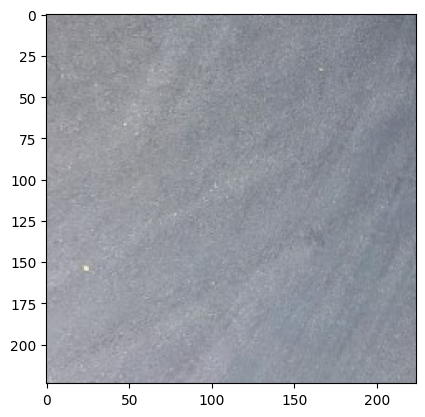

1177_[40.69973177289868, -89.40020055573095]_ 2023-10-20 21-36-50_9.8235_LD.jpg 100


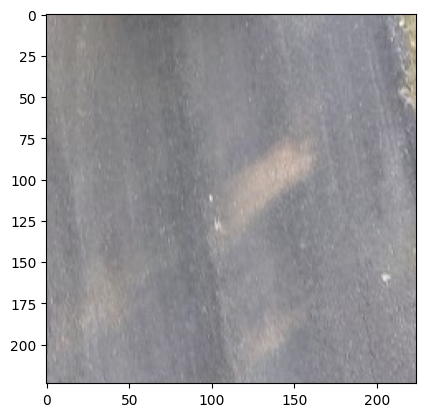

1186_(40.6994078333333, -89.4002271666667)_ 2023-10-20 21-36-59_18.15775_D.jpg 100


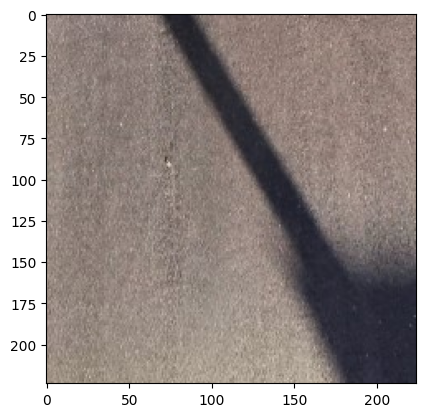

1218_(40.699746, -89.400932)_ 2023-10-20 21-37-42_15.3809_D.jpg 100


1221_(40.6997466666667, -89.4007743333333)_ 2023-10-20 21-37-44_23.606_D.jpg 100


1227_[40.69971441906458, -89.40046654875611]_ 2023-10-20 21-37-48_23.8798_LD.jpg 100


1252_(40.6992551666667, -89.4007283333333)_ 2023-10-20 21-38-10_15.7176_D.jpg 100


1290_(40.6994943333333, -89.4023748333333)_ 2023-10-20 21-38-43_21.0678_D.jpg 100


KeyboardInterrupt: 

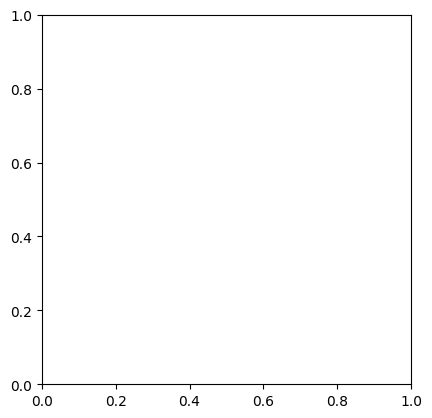

In [27]:
testingcsv = pd.read_csv("./data/train.csv")

#display all images with a PCI of less than 10
for index, row in testingcsv.iterrows():
    if row["PCI"] > 99:
        image = load_image("./data/train/" + row["image_name"])
        plt.imshow(image)
        plt.show()
        print(row["image_name"], row["PCI"])